In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import_df = pd.read_csv('data/gummy_data.csv')

In [3]:
import_df.shape

(71, 9)

In [4]:
import_df.sample(5)

,pack,pear,carrot,grape,berry,apple,sum,3rd pack,box
55,56,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
48,49,1.0,3.0,2.0,2.0,0.0,8,NaN,6.0
22,23,0.0,2.0,5.0,1.0,1.0,9,NaN,3.0
27,28,1.0,1.0,0.0,3.0,3.0,8,NaN,4.0
33,34,1.0,3.0,3.0,1.0,0.0,8,NaN,4.0


In [5]:
df = import_df[import_df['sum'] != 0]

In [6]:
df.shape

(55, 9)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55 entries, 0 to 54
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pack      55 non-null     int64  
 1   pear      55 non-null     float64
 2   carrot    55 non-null     float64
 3   grape     55 non-null     float64
 4   berry     55 non-null     float64
 5   apple     55 non-null     float64
 6   sum       55 non-null     int64  
 7   3rd pack  3 non-null      object 
 8   box       55 non-null     float64
dtypes: float64(6), int64(2), object(1)
memory usage: 4.3+ KB


In [8]:
df.describe()

,pack,pear,carrot,grape,berry,apple,sum,box
count,55.00000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000
mean,28.00000,1.418182,1.927273,2.272727,1.254545,1.272727,8.145455,3.800000
std,16.02082,1.100352,1.168325,1.433134,0.927326,1.079344,0.355808,1.544404
min,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,1.000000
25%,14.50000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,2.500000
50%,28.00000,1.000000,2.000000,2.000000,1.000000,1.000000,8.000000,4.000000
75%,41.50000,2.000000,3.000000,3.000000,2.000000,2.000000,8.000000,5.000000
max,55.00000,5.000000,4.000000,6.000000,3.000000,4.000000,9.000000,6.000000


In [9]:
gummies_per_pack = df['sum'].value_counts(normalize=True)
gummies_per_pack

8    0.854545
9    0.145455
Name: sum, dtype: float64

Text(0.5, 1.0, 'Ratio of packs that have 8 vs 9 gummies')

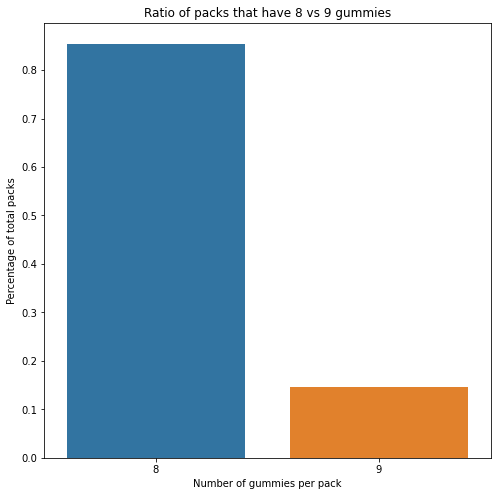

In [29]:
plt.figure(figsize=(8,8))
sns.barplot(x=gummies_per_pack.index,y=gummies_per_pack.values);
plt.xlabel('Number of gummies per pack')
plt.ylabel('Percentage of total packs')
plt.title('Ratio of packs that have 8 vs 9 gummies')

In [11]:
pears_per_pack = df['pear'].value_counts(normalize=True)
carrots_per_pack = df['carrot'].value_counts(normalize=True)
grapes_per_pack = df['grape'].value_counts(normalize=True)
berrys_per_pack = df['berry'].value_counts(normalize=True)
apples_per_pack = df['apple'].value_counts(normalize=True)

In [12]:
df_lst = [pears_per_pack,carrots_per_pack,grapes_per_pack,berrys_per_pack,apples_per_pack]
#merged_df = pd.concat([df1, df2])
fruit_df = pd.concat(df_lst, axis = 1)

In [16]:
print(fruit_df)

         pear    carrot     grape     berry     apple
0.0  0.163636  0.145455  0.090909  0.218182  0.236364
1.0  0.472727  0.200000  0.218182  0.418182  0.454545
2.0  0.218182  0.309091  0.290909  0.254545  0.145455
3.0  0.090909  0.272727  0.236364  0.109091  0.127273
4.0  0.036364  0.072727  0.090909       NaN  0.036364
5.0  0.018182       NaN  0.036364       NaN       NaN
6.0       NaN       NaN  0.036364       NaN       NaN


<AxesSubplot:ylabel='pear'>

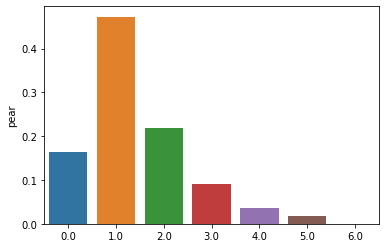

In [23]:
#sns.barplot(x=gummies_per_pack.index,y=gummies_per_pack.values);
sns.barplot(x=fruit_df.index,y=fruit_df.pear)

In [17]:
fruit_lst = ['pear','carrot','grape','berry','apple']
val_counts = df[fruit_lst].apply(pd.Series.value_counts, normalize=True)
val_counts

,pear,carrot,grape,berry,apple
0.0,0.163636,0.145455,0.090909,0.218182,0.236364
1.0,0.472727,0.200000,0.218182,0.418182,0.454545
2.0,0.218182,0.309091,0.290909,0.254545,0.145455
3.0,0.090909,0.272727,0.236364,0.109091,0.127273
4.0,0.036364,0.072727,0.090909,NaN,0.036364
5.0,0.018182,NaN,0.036364,NaN,NaN
6.0,NaN,NaN,0.036364,NaN,NaN


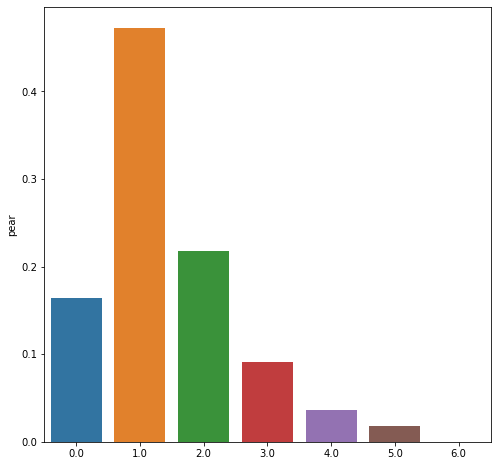

In [23]:
plt.figure(figsize=(8,8))
sns.barplot(x=val_counts.index,y=val_counts.pear);